# <center><font style="color:rgb(100,109,254)">Edge Detection with First & Second Order Derivatives</font></center>


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#    <font style="color:rgb(134,19,348)"> First Order Derivative Filters   </font>


### <font style="color:rgb(134,19,348)"> Perwit Filters   </font>

Lets see how can we use some filters to calculate the gradients of the image.

**Note:** These x, y gradients are also called x,y derivatives of the image

Lets first see how we can calculate the y gradient, the same kind of logic will translate for x gradient. So the question we have to ask is what kind of filter will let us calculate the y gradient.
What we want to find is the change or difference in intensity for every pixel, so we want for every pixel is to tell us the difference between the top and bottom pixel. So we just have to subtract the top and bottom pixel and store the gradient in the current pixel.

The following kernel will let us achieve that

\begin{bmatrix}
-1 \\
 0  \\
 1  \\
\end{bmatrix}

Similarly if we wanted to calculate the horizontal gradient we would use a kernel like this:

\begin{bmatrix}
-1 & 0 &1
\end{bmatrix}

Now if we had a horizontal patch of image valued [0.255.255] which as you can see is a patch which goes from black `0` to white `255`. 

Now if we apply our horizontal filter to it like:

[-1 * 0 + 0 * 255 + 1 * 255] = +255

So the magnitude of the gradient for the middle pixel is `255` in the positive x direction.

Now this all good but remember in the kernels we have previously used, we usually use a matrix kernel instead of the vector because by taking into account more pixels we can have a better estimate of the gradient, so we will do just that and insted of a 1 x 3 patch, we will use a 3 x 3 patch.

So for Calculating x gradient we have:


\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}

And for y gradient we have 

\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{bmatrix}


Now these filters are called the **Prewitt filters.** 



##  <font style="color:rgb(134,19,348)">   Sobel Filters  </font>


We can make these gradient calculations even more robust and noise free if we do perform gaussian blurring on the image before applying the gradient filter. Since blurring is also a convolution operation, So now we have to apply two convolution operations one after the other.

And just like that you can combine a bunch of linear operations into one similarly, we can also combine both these operations into a single convolution operation (kind of like how we created our image sharpening filter).

Now Opencv already has one such implementation, they are called Sobel filters, before taking X or Y gradient they also do gaussian smoothing.

These are the Sobel x and y filters


$$
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}
\quad
\quad
\quad
\quad
\quad
\quad
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}
$$

[```dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)


- **`src`**	input image.
- **`dst`**	output image of the same size and the same number of channels as src .
- **`ddepth`**	output image depth,in the case of 8-bit input images it will result in truncated derivatives.
- **`dx`**	order of the derivative x.
- **`dy`**	order of the derivative y.
- **`ksize`**	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- **`scale`**	optional scale factor for the computed derivative values; by default, no scaling is applied.
- **`delta`**	optional delta value that is added to the results prior to storing them in dst.
- **`borderType`**	pixel extrapolation method.

Now with Sobel filter , you can either take x gradients or y gradients. For x gradient you have to make the `dx` value `1` which means just take the first order derivative and `dy` is `0` which means to ignore the y gradient. Now if you wanted to take the y gradient then you would do vice versa

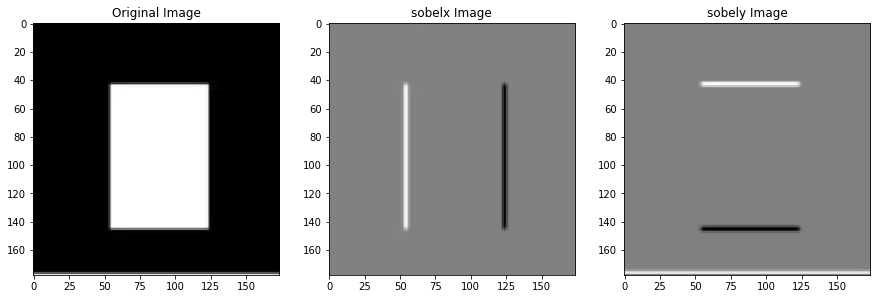

In [8]:
img = cv2.imread('media/M3/whiteblock.jpg', 0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)       
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)       

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(132);plt.imshow(sobelx[:,:],cmap='gray');plt.title("sobelx Image");
plt.subplot(133);plt.imshow(sobely[:,:],cmap='gray');plt.title("sobely Image");

In the above results the white is the positive x , y gradients. Gray can be thought of as `0` and the black is the negative gradient.

###  <font style="color:rgb(134,19,348)">   Sobel Filters as Horizontal & Vertical Edge Detector    </font>
Now lets take a look at another example to see how this can be used a horizontal or vertical edge detector.

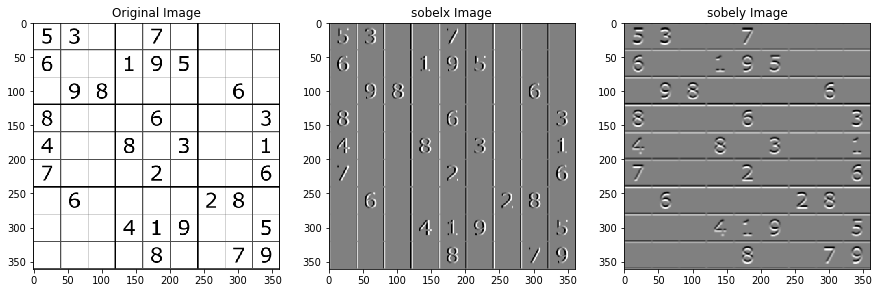

In [10]:
img = cv2.imread('media/M3/suduko1.png', 0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=-1)       
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)       

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(img[:,:],cmap='gray');plt.title("Original Image");
plt.subplot(132);plt.imshow(sobelx[:,:],cmap='gray');plt.title("sobelx Image");
plt.subplot(133);plt.imshow(sobely[:,:],cmap='gray');plt.title("sobely Image");

**It should be noted that differencing operations are more affected by noise compared to summing operations**, take for an example there are two numbers 60 and 65, if you add some noise to 65 and make it 67 then the difference between these two goes from 5 to 7 (67-60 instead of 65-60). A increase in change of 2 / 5 = 40%

If this was an addition operation then the noise would not have caused that much problem since the change would be just (67 - 65) / 125 = 1.6%

So in summary differentiation (calculating derivatives) will perform poorly in presence of noise, whereas an addition operation wont be effected by noise that much.

#    <font style="color:rgb(134,19,348)">  2nd Order Derivatives  </font>
We have seen Sobel calculates 1st order derivatives in x and y direction as it gives large values when there is large changes in intensities (during edges) so we use it as an edge detector , similarly we can use 2nd order derivatives which have zero values when they fall on edges (zero crossing).

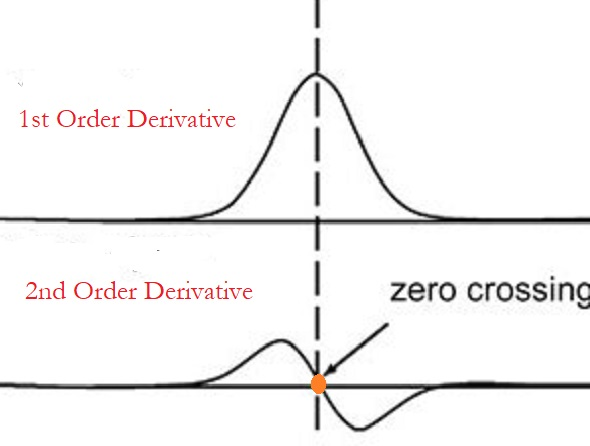



##  <font style="color:rgb(134,19,348)">  Laplacian Filter    </font>

Now laplacian filter are 2nd order derivatives, they are given by,


$$
L(x,y) = \frac{\partial^2 Image }{\partial^2 x} +  \frac{\partial^2 Image }{\partial^2 y}
$$

Now the above expression may look daunting but don't worry, the expression reduces to a simple kernel below via which you can perform laplacian filtering.

$$
\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$


Now Unlike Sobel which performs Gaussian to reduce noise prior to calculating gradients, the laplacian does not do that and so its susceptible to noise so we could manually perform a gaussian filter to reduce the noise before we apply the laplacian. This may not always give better results but its good to try.

[```dst = cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)


- **src**	Source image.
- **dst**	Destination image of the same size and the same number of channels as src .
- **ddepth**	Desired depth of the destination image.
- **ksize**	Aperture size used to compute the second-derivative filters. See getDerivKernels for details. The size must be positive and odd.
- **scale**	Optional scale factor for the computed Laplacian values. By default, no scaling is applied. See getDerivKernels for details.
- **delta**	Optional delta value that is added to the results prior to storing them in dst .
- **borderType**	Pixel extrapolation method, see BorderTypes

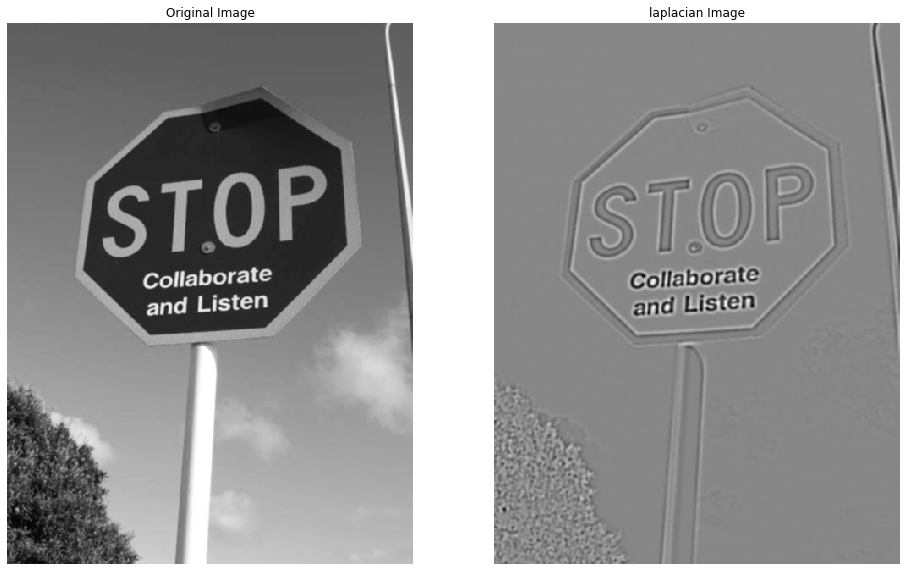

In [11]:
img = cv2.imread('media/M3/stop.jpg',0)

img = cv2.GaussianBlur(img,(3,3),0,0)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=13)   


plt.figure(figsize=[16,16])
plt.subplot(121);plt.imshow(img,cmap='gray');plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(laplacian, cmap='gray');plt.title("laplacian Image");plt.axis('off');